In [1]:
'''Karan Kumar 14906619'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
#define constants
m_e = 10**-27 #grams mass of electron
q = 5*10**-10 #esu electron charge
lightspeed = 3.00*(10**10) #cm/s speed of light
vel = 0.3*lightspeed 

eta =0.1 #efficeny
p = 2 #index
lorentz = 1000
Emin =  m_e*lightspeed**2
Emax  = lorentz*Emin
sgrA_mass = 4.2*(10**6) # solar mass, mass of sgrA
R_0 = 6.3*(10**12) # cm intial radius of blob
stepsize = 100
time_arr = np.logspace(-3, 6, num=stepsize) #s
freq_arr = np.logspace(10, 14,num=stepsize) #hz
eng_arr = np.linspace(Emin, Emax, num= stepsize)

In [3]:
#define constants
def eddington(mass):
    '''Evaluate the eddington luminosity in ergs/s as function of solar mass
    input: 
    mass: solar mass
    variables:
    L_edd = eddington luminsoty ergs/s
    
    return L_edd'''
    L_edd = 1.25*(10**38)*mass
    return L_edd
L_edd = eddington(sgrA_mass)

In [26]:
#define functions
def C_constant(energy,radius):
    '''Define the C constant that goes into the absorption coefficent
    input:
    energy: array of energ of electron in ergs
    radius: array of radius of blob in cm
    
    variables
    eta- efficeny rate unitless
    constants- self explanatory
    L_edd - see function eddington
    C_const - the constant to be evaluated
    Ue- electron energy desnity ergs/cm^3
    return C_const, Ue'''
    constants = ((eta/4*np.pi*vel)*L_edd)
    Ue = constants/(radius**2)
    C_const = Ue/np.log(Emax/(Emin)) #ergs/s*cm^2
    return C_const, Ue
    
def mag_density(radius):
    '''Evalute the magnetic field density using equipartion
    input:
    radius: radius of blob
    variables:
    Ub- magnetic energy density ergs/cm^3
    mag - magnetic field strength gauss
    return
    mag, Ub'''
    
    constants = (3*eta*L_edd)/(8*(np.pi**2)*vel)
    Ub = constants/(radius**2) #ergs/cm^3
    mag = np.sqrt(8*np.pi*Ub) #gauss
    return mag, Ub
def absorption(freq,C,mag):
    '''Evaluate the absorption coefficent for various p indicies 
    input: 
    freq- frequnecy
    C: see function C_consant
    mag: magnetic field strength see function mag_density
    variables:
    gammas- evaluate a specific gamma function for different p values
    absorb- the absorption coeifficent
    
    return
    absorb'''
    gamA = gamma((3*p+2)/12)
    gamB = gamma((3*p+22)/12)

    abs_const = gamA*gamB*(3*np.sqrt(3)*q**4)/(16*(np.pi**2)*(m_e**3)*(lightspeed**5))

    absorb = abs_const*C*(mag**2)*(freq**(-3))
    
    return absorb
def emission(freq, C, mag):
    '''Evaluate the emission coefficent for various p indicies 
    input: 
    freq- frequnecy
    C: see function C_consant
    mag: magnetic field strength see function mag_density
    variables:
    gammas- evaluate a specific gamma function for different p values
    emission- the emission coeifficent
    
    return
    emission'''
    gamC = gamma((p/4)+(19/12))
    gamD = gamma((p/4)-(1/12))
    ems_const = (q**2.5*gamC*gamD)/(24*(np.pi**2)*(m_e**1.5)*(lightspeed**2.5))
    

    emission = (ems_const*C)/np.sqrt(2*np.pi*freq*mag)
    return emission
def blob_growth(ro,t):
    '''Evaluate the radius of the blob in cm
    
    input:
    ro: float of intial radius of blob in cm
    time: array of times in seconds
    variables
    vel- velocity of blob cm/s
    
    return R'''
    R = ro + vel*t
    return R

def V_peak(radius, mag, C_const):
    #idk about this one
    '''Peak frequency of system Since frequency depends on magnetic strength,
    radius and the C_constant pick the maximum of the array since it should be peak the peak of the intensity curve
    input: 
    Radius
    mag 
    C_constants
    variables 
    V_c - array of peak frequencies for various input paramters, 
    return
    max of V_c'''
    #same constants from absorption function
    gamA = gamma((3*p+2)/12)
    gamB = gamma((3*p+22)/12)
    abs_const = gamA*gamB*(3*np.sqrt(3)*q**4)/(16*(np.pi**2)*(m_e**3)*(lightspeed**5))
    V_c = ((abs_const)*(radius*(mag**2)*(C_const)))**(1/3)
    V_c = np.max(V_c) #hz
    
    return V_c

In [29]:
#call all the functions
radius = blob_growth(R_0,time_arr)
C_const, Ue_sgr = C_constant(eng_arr, radius)

mag_sgr, Ub_sgr = mag_density(radius)

emission_sgr = emission(freq_arr, C_const, mag_sgr)
absorption_sgr = absorption(freq_arr,C_const,mag_sgr)
V_peak_sgr = V_peak(radius,mag_sgr,C_const)

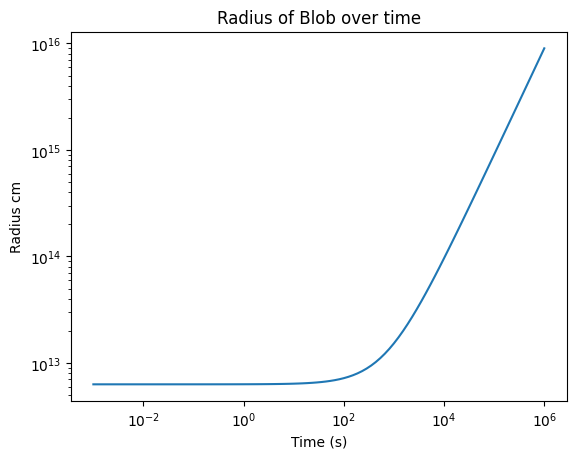

In [6]:
#plot radius and blob and conservation of energy
plt.loglog(time_arr,radius)
plt.xlabel('Time (s)')
plt.ylabel('Radius cm')
plt.title("Radius of Blob over time")
plt.show()

Blob grows linearly in time for large times

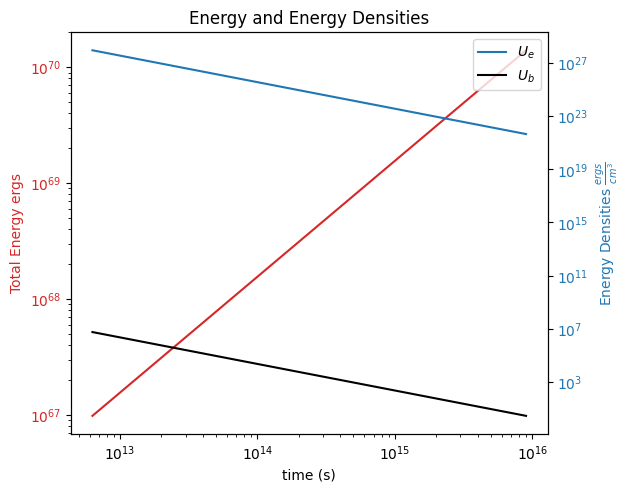

In [52]:
#conservation of energy
def total_eng(Ue, Ub,radius):
    '''Calculate the total energy of the system form energy density and volume
    input: 
    Ue- electron energy density ergs/cm**3
    Ub- magnetic energy density erg/cm**3
    radius - radius of the blob cm 
    
    variables"
    volume - calculate the volume from the radius cm**3
    E_t total energy ergs'''
    volume = (4*np.pi/3)*(radius**3)
    E_t = volume*(Ue + Ub)
    return E_t
Total_eng_sgr= total_eng(Ue_sgr,Ub_sgr,radius)

#plot the enrgies

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Total Energy ergs', color=color)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.plot(radius, Total_eng_sgr, color=color,label='Total Energy ergs')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Energy Densities $\\frac{ergs}{cm^3}$', color=color)
ax2.set_yscale('log')
#ax2.set_xscale("log")
ax2.plot(radius, Ue_sgr, color=color, label = '$U_e$')
ax2.plot(radius, Ub_sgr, color='k', label='$U_b$')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout() 
plt.title("Energy and Energy Densities")
plt.show()

Conservation of energy check is off:
maybe becuase of signifiant change in magntiude in time array since volume = $V(t)$
<br>
Total energy increases by $10^4$ OOM

In [60]:
jansky_cov = 10**-26 #covert to milla jansky by multiplying
def intensity(emission, absorption,freq,radius):
    '''Determine the intensity in the optically thick and thin regimes
    Use the peak frequency to classify the regions
    input:
    emission- emission coefficent
    absorption - absorption coefficent
    freq - array of frequencies hz
    radius - array of radius of blob cm 
    
    Variables
    Int- list to hold intensity values 
    int_thick - intensity in optically thick regime
    int_thin - intentisy --- thin regime
    V_peak_sgr- peak frequency of SGRA
    
    Return 
    Int'''

    #calculate optical depth
    tau  = absorption*radius
    Int = emission/absorption
    Sv = Int*(1-np.exp(-tau))
    return Sv
sgr_int = intensity(emission_sgr, absorption_sgr,freq_arr,radius)
# sgr_int = np.array(sgr_int)
# sgr_int_janksy = sgr_int*jansky_cov # convert ot mJy
distance_to_sgrA = 8277.00* (3.00*10**18) #convert distance to cm
def flux(intensity,radius):
    ratio = radius/distance_to_sgrA
    dillute =  1/(distance_to_sgrA**2)
    flux = dillute*intensity
    return flux
flux_sgr = flux(sgr_int, radius)   

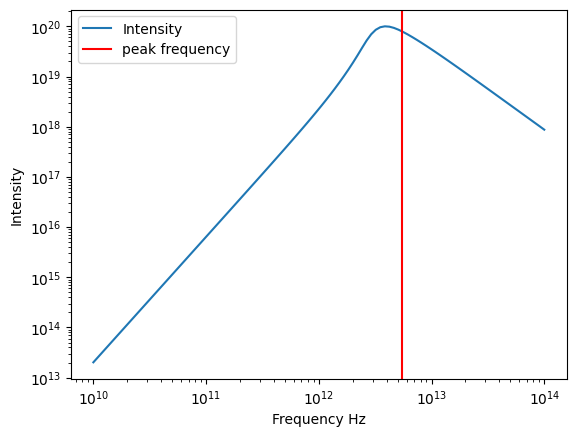

In [54]:
# plot the intensity spectrum and flux spectrum
plt.loglog(freq_arr, sgr_int, label="Intensity")
plt.xlabel("Frequency Hz")
plt.ylabel("Intensity")
plt.axvline(V_peak_sgr, color = 'r', label = 'peak frequency')
plt.legend()
plt.show()

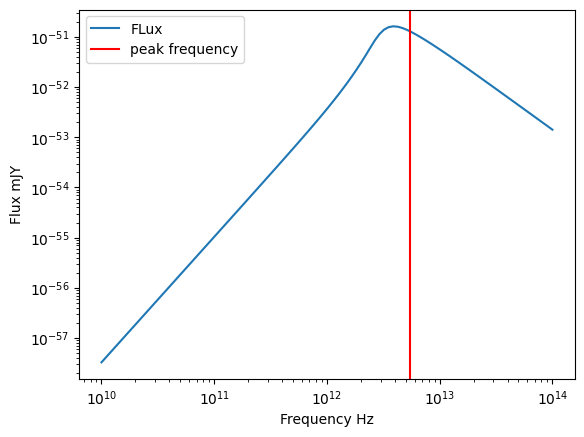

In [61]:
flux_sgr_jansky = flux_sgr*jansky_cov #convert to m Janksy
plt.loglog(freq_arr, flux_sgr_jansky, label="FLux")
plt.xlabel("Frequency Hz")
plt.ylabel("Flux mJY")
plt.axvline(V_peak_sgr, color = 'r', label = 'peak frequency')
plt.legend()
plt.show()